In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# Set seaborn style for better visuals
sns.set_style("whitegrid")

# Read the dataset
data = pd.read_csv("pr_data_v2.csv")

In [3]:
# 1. Dataset Overview
print("=== Dataset Overview ===")
print("Shape:", data.shape)
print("\nInfo:")
data.info()
print("\nSummary Statistics:")
display(data.describe())
print("\nMissing Values:")
display(data.isnull().sum())

=== Dataset Overview ===
Shape: (25, 15)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   additions                  25 non-null     int64 
 1   deletions                  25 non-null     int64 
 2   changed_files              25 non-null     int64 
 3   comments                   25 non-null     int64 
 4   commits                    25 non-null     int64 
 5   author_account_age_days    25 non-null     int64 
 6   author_public_repos        25 non-null     int64 
 7   author_merged_prs          25 non-null     int64 
 8   has_milestone              25 non-null     bool  
 9   requested_reviewers_count  25 non-null     int64 
 10  title_length               25 non-null     int64 
 11  description_length         25 non-null     int64 
 12  changed_files_list         25 non-null     object
 13  pr_age_days        

,additions,deletions,changed_files,comments,commits,author_account_age_days,author_public_repos,author_merged_prs,requested_reviewers_count,title_length,description_length,pr_age_days
count,25.000000,25.000000,25.000000,25.00000,25.000000,25.000000,25.000000,25.000000,25.00000,25.00000,25.000000,25.000000
mean,198.840000,516.240000,12.000000,1.28000,3.600000,4402.840000,79.400000,553.640000,0.36000,50.84000,624.640000,0.360000
std,519.252963,1674.090457,32.596012,1.30767,7.094599,1857.622061,74.049533,532.026071,0.81035,31.20187,524.447557,1.496663
min,1.000000,0.000000,1.000000,0.00000,1.000000,43.000000,2.000000,0.000000,0.00000,17.00000,4.000000,-1.000000
25%,5.000000,0.000000,1.000000,0.00000,1.000000,4025.000000,27.000000,35.000000,0.00000,32.00000,159.000000,0.000000
50%,23.000000,2.000000,2.000000,1.00000,1.000000,5277.000000,65.000000,389.000000,0.00000,49.00000,424.000000,0.000000
75%,69.000000,37.000000,4.000000,2.00000,2.000000,5717.000000,94.000000,1163.000000,0.00000,60.00000,1026.000000,0.000000
max,1905.000000,6078.000000,120.000000,5.00000,29.000000,6010.000000,226.000000,1326.000000,3.00000,179.00000,1726.000000,4.000000



Missing Values:


additions                    0
deletions                    0
changed_files                0
comments                     0
commits                      0
author_account_age_days      0
author_public_repos          0
author_merged_prs            0
has_milestone                0
requested_reviewers_count    0
title_length                 0
description_length           0
changed_files_list           0
pr_age_days                  0
merged                       0
dtype: int64


=== Target Variable Distribution (merged) ===


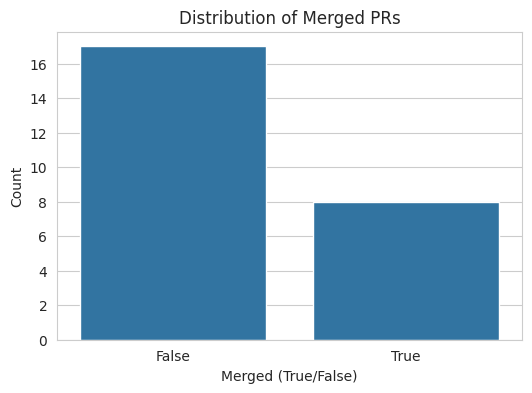

Proportion of Merged PRs:


merged
False    0.68
True     0.32
Name: proportion, dtype: float64

In [4]:
# 2. Target Variable Distribution
print("\n=== Target Variable Distribution (merged) ===")
plt.figure(figsize=(6, 4))
sns.countplot(x="merged", data=data)
plt.title("Distribution of Merged PRs")
plt.xlabel("Merged (True/False)")
plt.ylabel("Count")
plt.show()
print("Proportion of Merged PRs:")
display(data["merged"].value_counts(normalize=True))


=== Numeric Feature Distributions ===


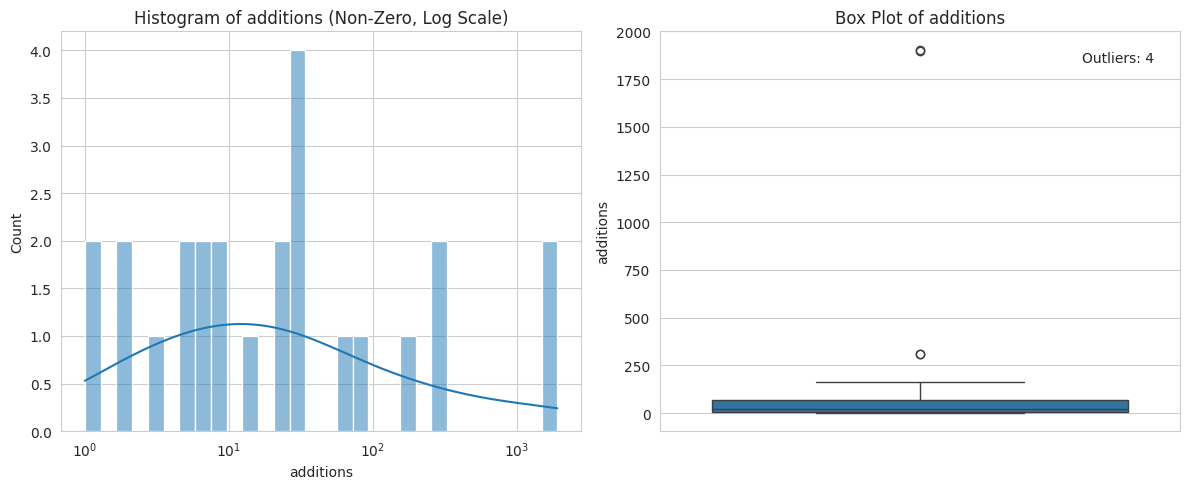


Summary for additions:
Mean: 198.84
Median: 23.00
Zero Count: 0/25
Outliers (> Q3 + 1.5*IQR): 4


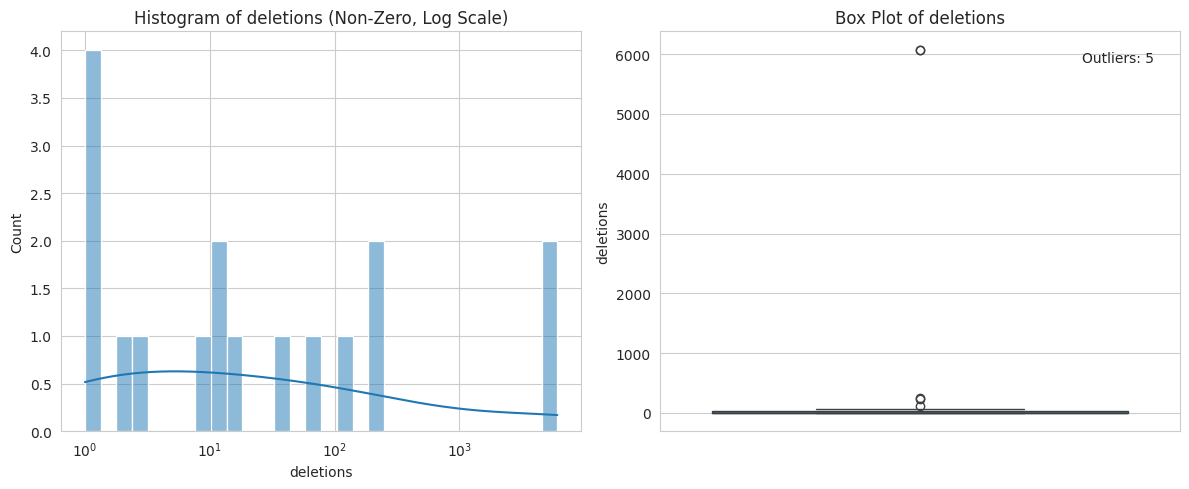


Summary for deletions:
Mean: 516.24
Median: 2.00
Zero Count: 8/25
Outliers (> Q3 + 1.5*IQR): 5


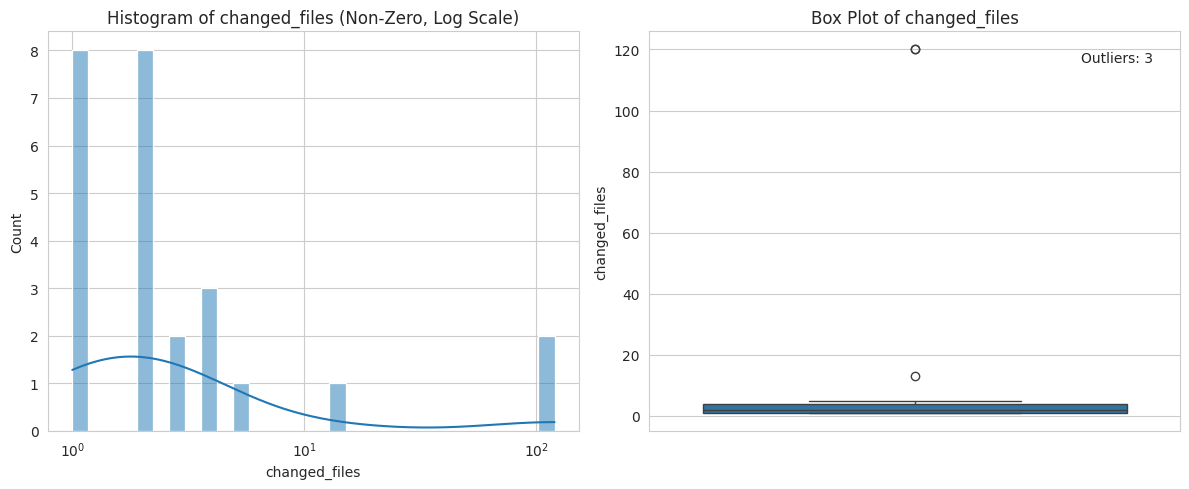


Summary for changed_files:
Mean: 12.00
Median: 2.00
Zero Count: 0/25
Outliers (> Q3 + 1.5*IQR): 3


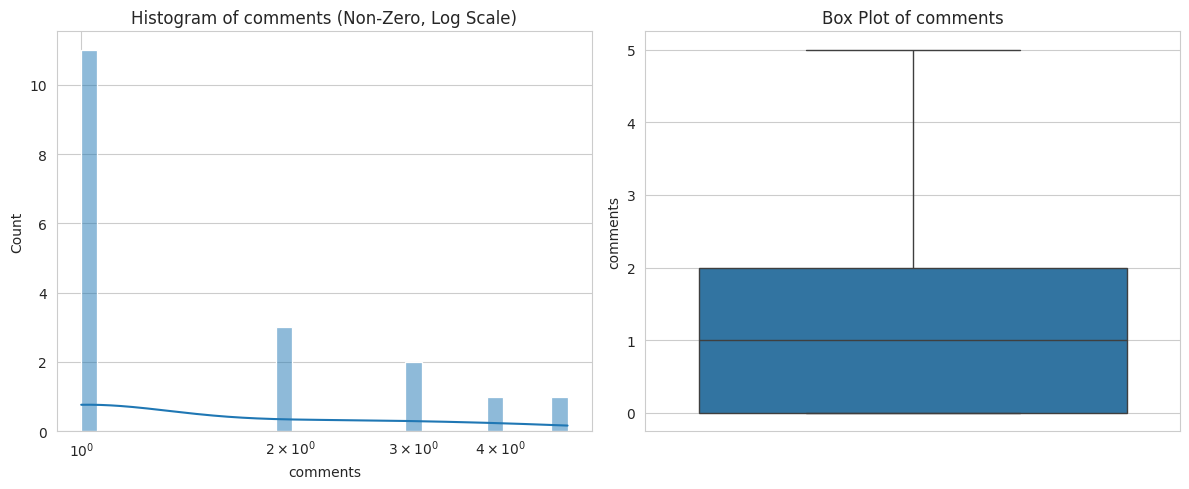


Summary for comments:
Mean: 1.28
Median: 1.00
Zero Count: 7/25
Outliers (> Q3 + 1.5*IQR): 0


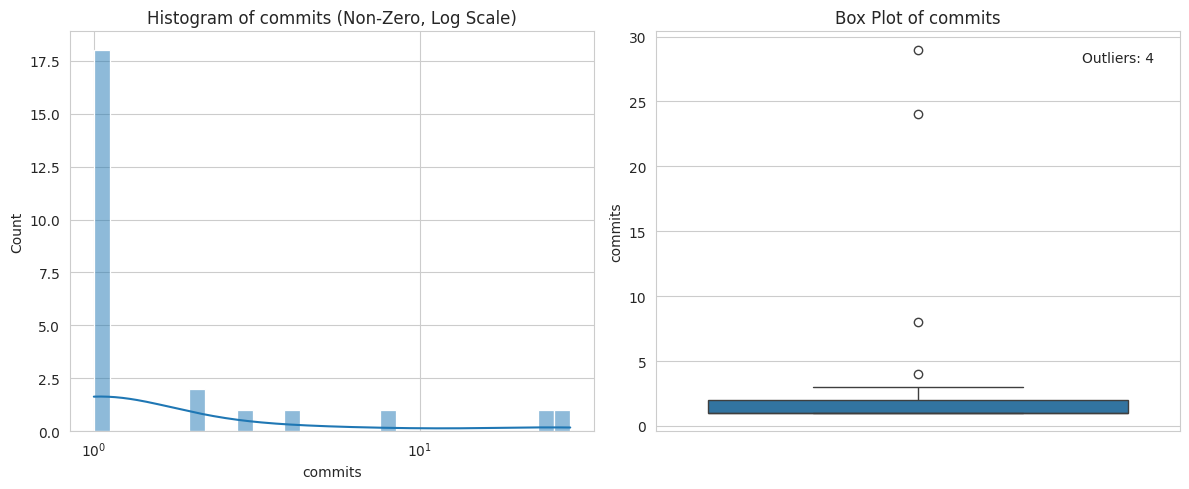


Summary for commits:
Mean: 3.60
Median: 1.00
Zero Count: 0/25
Outliers (> Q3 + 1.5*IQR): 4


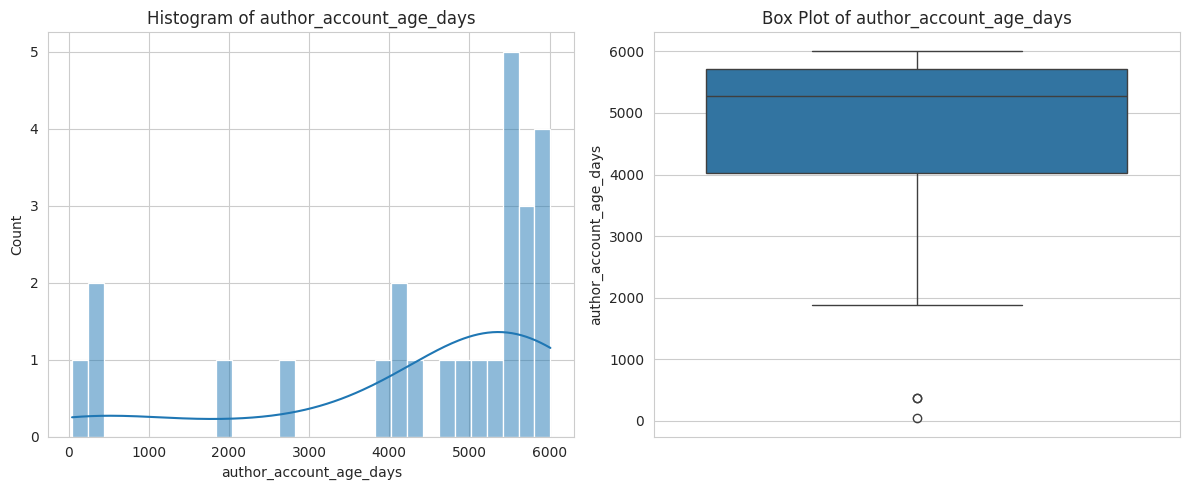


Summary for author_account_age_days:
Mean: 4402.84
Median: 5277.00
Zero Count: 0/25
Outliers (> Q3 + 1.5*IQR): 0


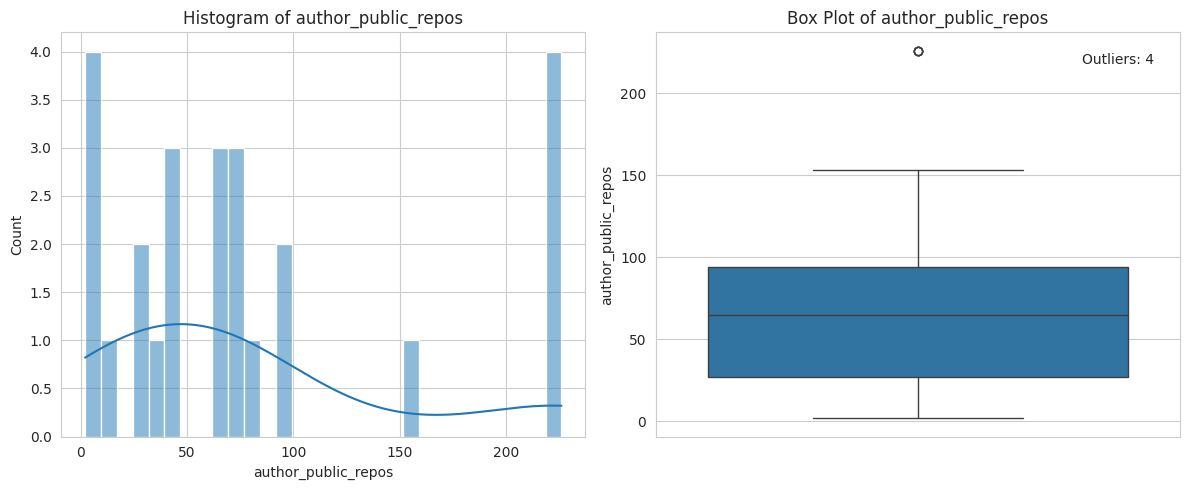


Summary for author_public_repos:
Mean: 79.40
Median: 65.00
Zero Count: 0/25
Outliers (> Q3 + 1.5*IQR): 4


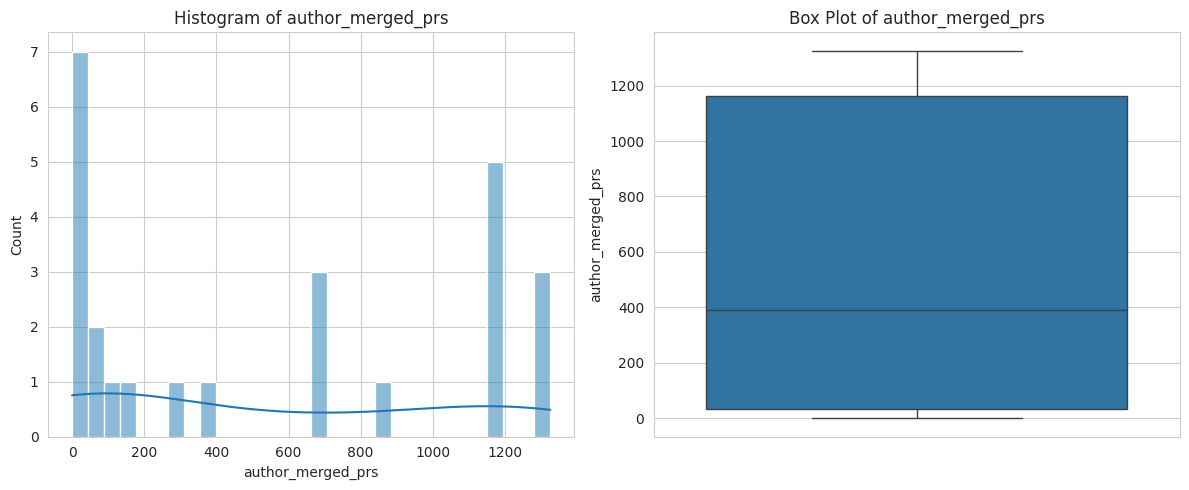


Summary for author_merged_prs:
Mean: 553.64
Median: 389.00
Zero Count: 1/25
Outliers (> Q3 + 1.5*IQR): 0


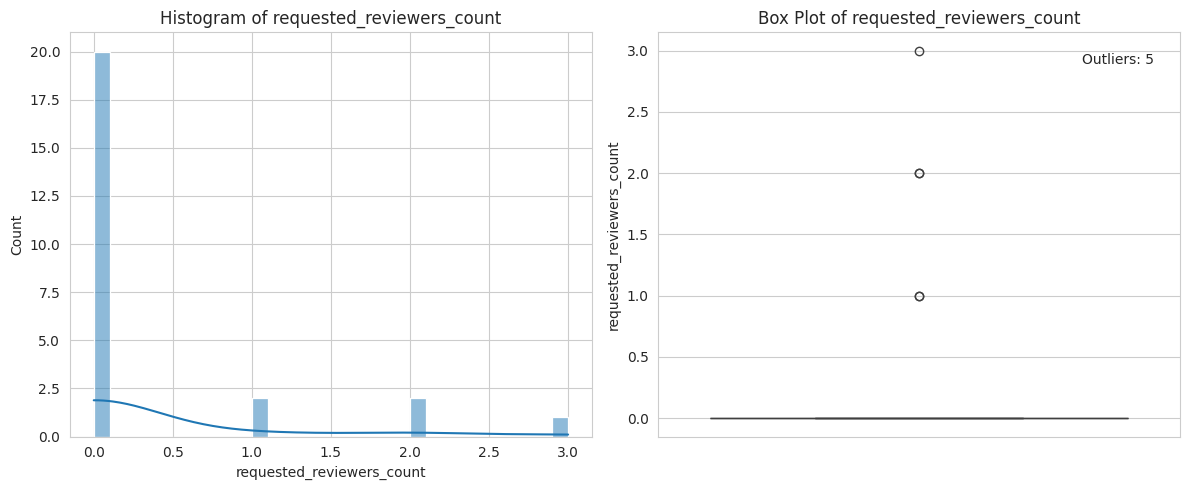


Summary for requested_reviewers_count:
Mean: 0.36
Median: 0.00
Zero Count: 20/25
Outliers (> Q3 + 1.5*IQR): 5


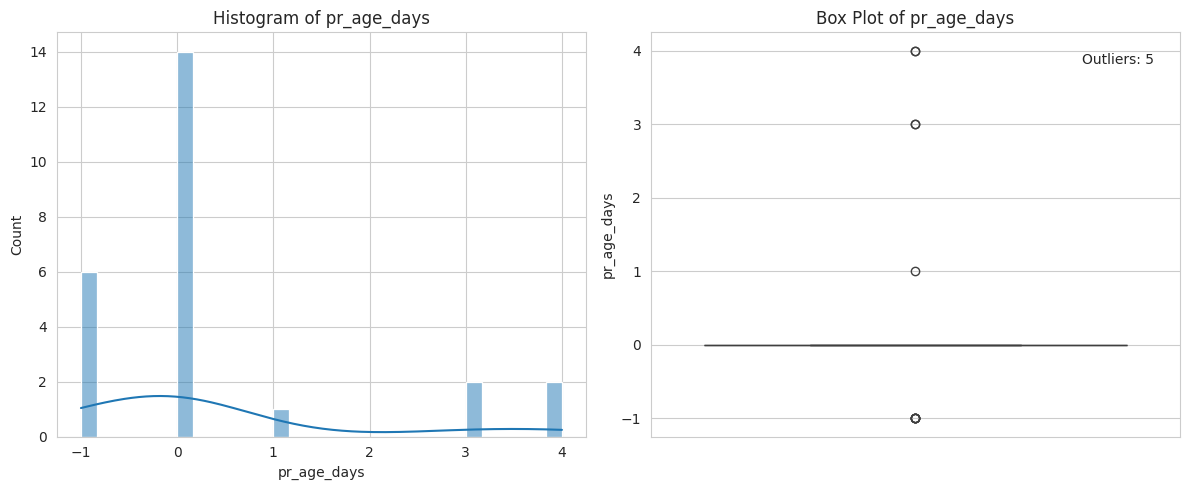


Summary for pr_age_days:
Mean: 0.36
Median: 0.00
Zero Count: 14/25
Outliers (> Q3 + 1.5*IQR): 5


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# 3. Numeric Feature Distributions
numeric_cols = [
    "additions", "deletions", "changed_files", "comments", "commits",
    "author_account_age_days", "author_public_repos", "author_merged_prs",
    "requested_reviewers_count", "pr_age_days"
]
print("\n=== Numeric Feature Distributions ===")
for col in numeric_cols:
    plt.figure(figsize=(12, 5))
    
    # Histogram with log scale for skewed features
    plt.subplot(1, 2, 1)
    if col in ["additions", "deletions", "comments", "commits", "changed_files"]:
        non_zero_data = data[data[col] > 0][col]
        if not non_zero_data.empty:
            sns.histplot(non_zero_data, bins=30, kde=True, log_scale=True)
            plt.title(f"Histogram of {col} (Non-Zero, Log Scale)")
            # Format x-axis for log scale
            plt.gca().xaxis.set_major_formatter(ticker.LogFormatterMathtext())
        else:
            sns.histplot(data[col], bins=30, kde=True)
            plt.title(f"Histogram of {col} (All Zeros)")
            # Format x-axis for linear scale
            plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
            plt.gca().xaxis.get_major_formatter().set_scientific(False)
    else:
        sns.histplot(data[col], bins=30, kde=True)
        plt.title(f"Histogram of {col}")
        # Format x-axis for linear scale
        plt.gca().xaxis.set_major_formatter(ticker.ScalarFormatter())
        plt.gca().xaxis.get_major_formatter().set_scientific(False)
    plt.xlabel(col)
    plt.ylabel("Count")
    
    # Box plot with outlier annotation
    plt.subplot(1, 2, 2)
    sns.boxplot(y=data[col])
    plt.title(f"Box Plot of {col}")
    
    # Annotate outliers
    q1, q3 = data[col].quantile([0.25, 0.75])
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    outliers = data[data[col] > upper_bound][col]
    if not outliers.empty:
        plt.text(0.95, 0.95, f"Outliers: {len(outliers)}", 
                 transform=plt.gca().transAxes, ha='right', va='top')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary for context
    print(f"\nSummary for {col}:")
    print(f"Mean: {data[col].mean():.2f}")
    print(f"Median: {data[col].median():.2f}")
    print(f"Zero Count: {(data[col] == 0).sum()}/{len(data)}")
    print(f"Outliers (> Q3 + 1.5*IQR): {len(outliers)}")


=== Boolean Feature Distributions ===


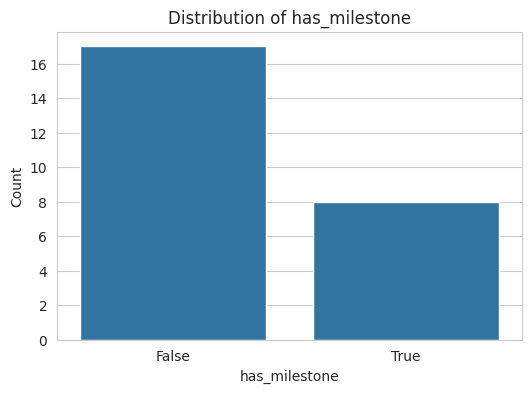

Proportion of has_milestone:


has_milestone
False    0.68
True     0.32
Name: proportion, dtype: float64

In [7]:
# 4. Categorical/Boolean Feature Distributions
boolean_cols = ["has_milestone"]
print("\n=== Boolean Feature Distributions ===")
for col in boolean_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, data=data)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
    print(f"Proportion of {col}:")
    display(data[col].value_counts(normalize=True))


=== Feature-Target Relationships ===


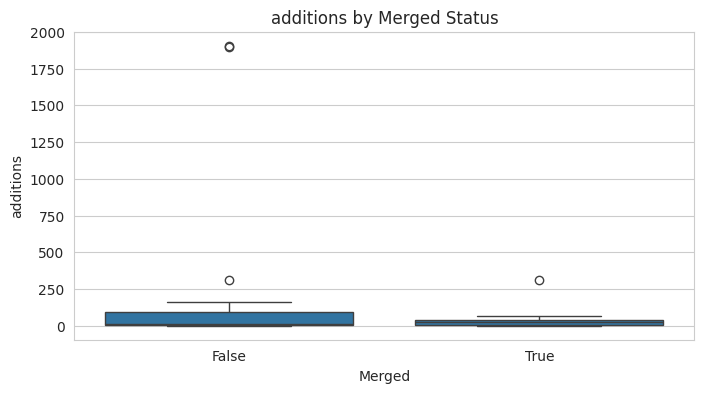

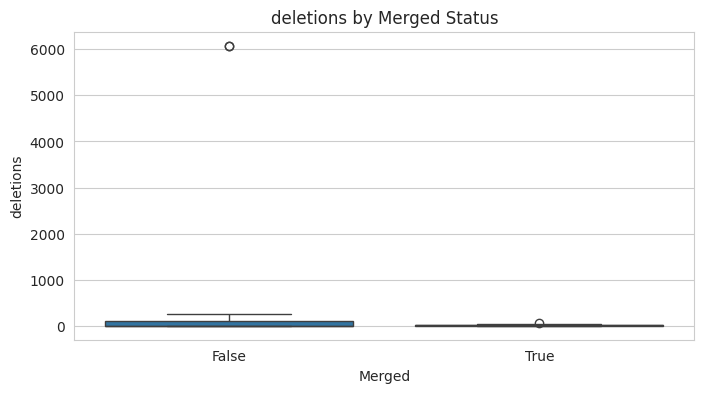

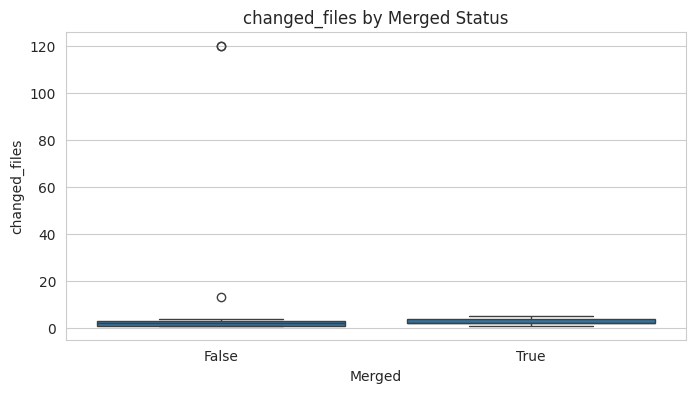

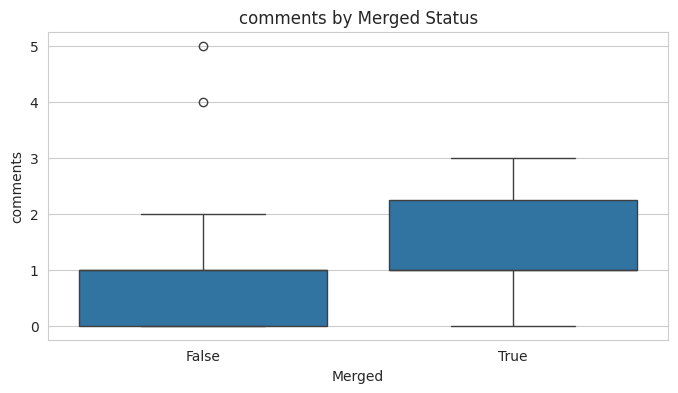

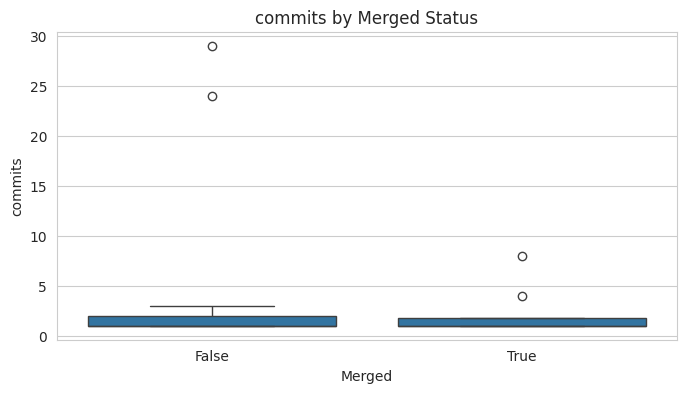

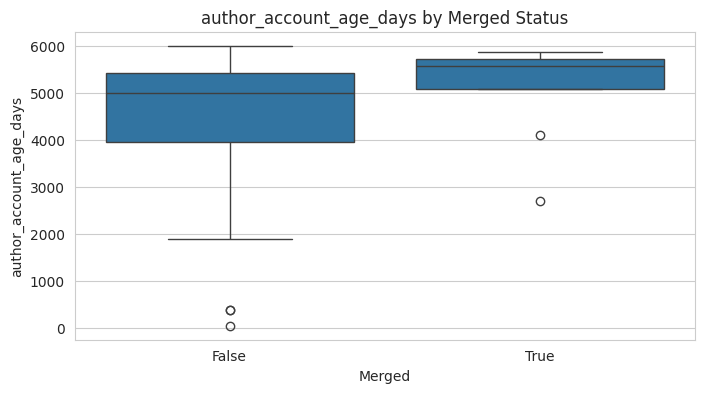

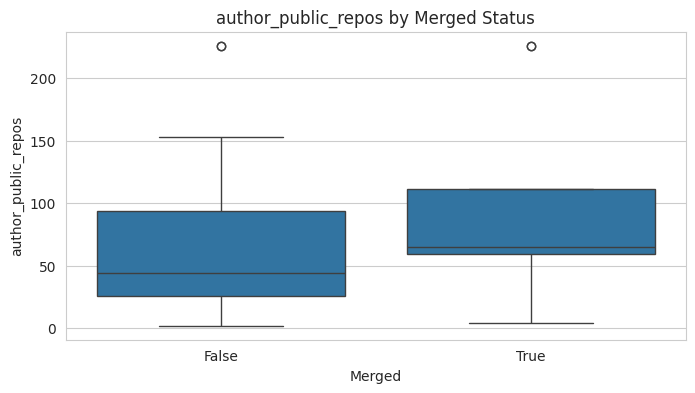

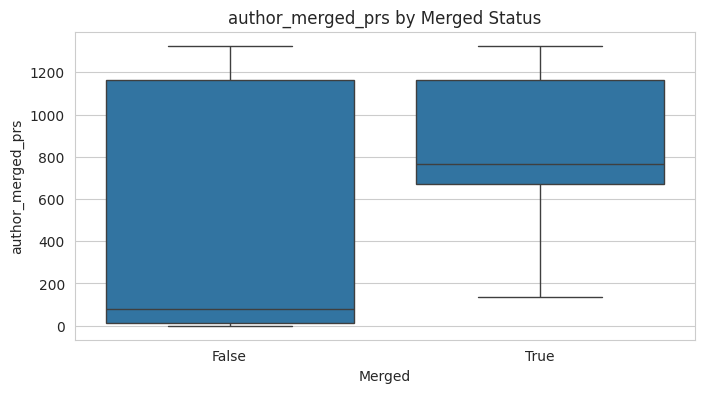

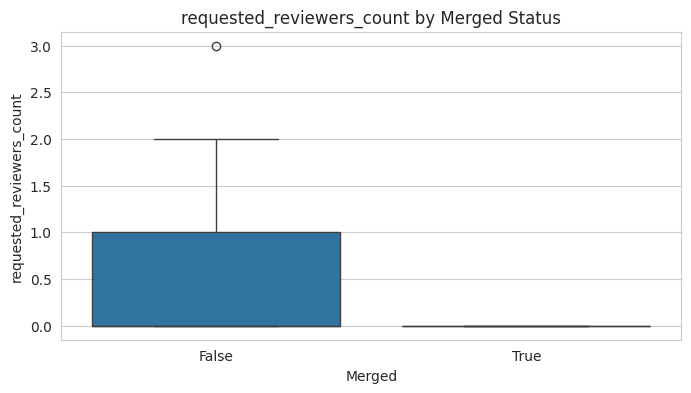

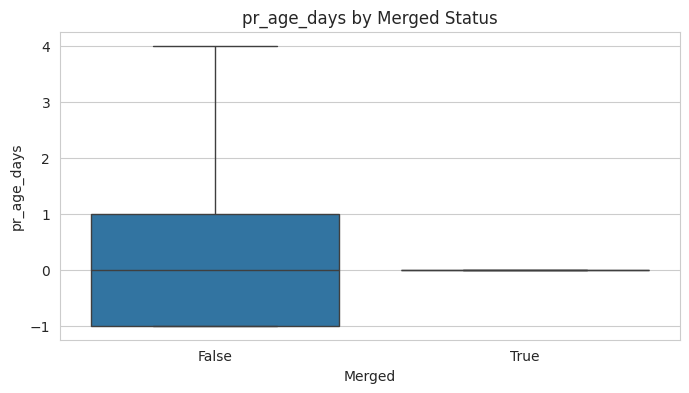

In [10]:
# 5. Feature-Target Relationships
print("\n=== Feature-Target Relationships ===")
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="merged", y=col, data=data)
    plt.title(f"{col} by Merged Status")
    plt.xlabel("Merged")
    plt.ylabel(col)
    plt.show()

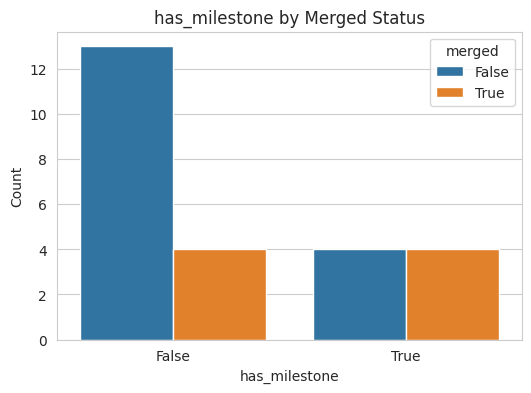

In [11]:
for col in boolean_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=col, hue="merged", data=data)
    plt.title(f"{col} by Merged Status")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

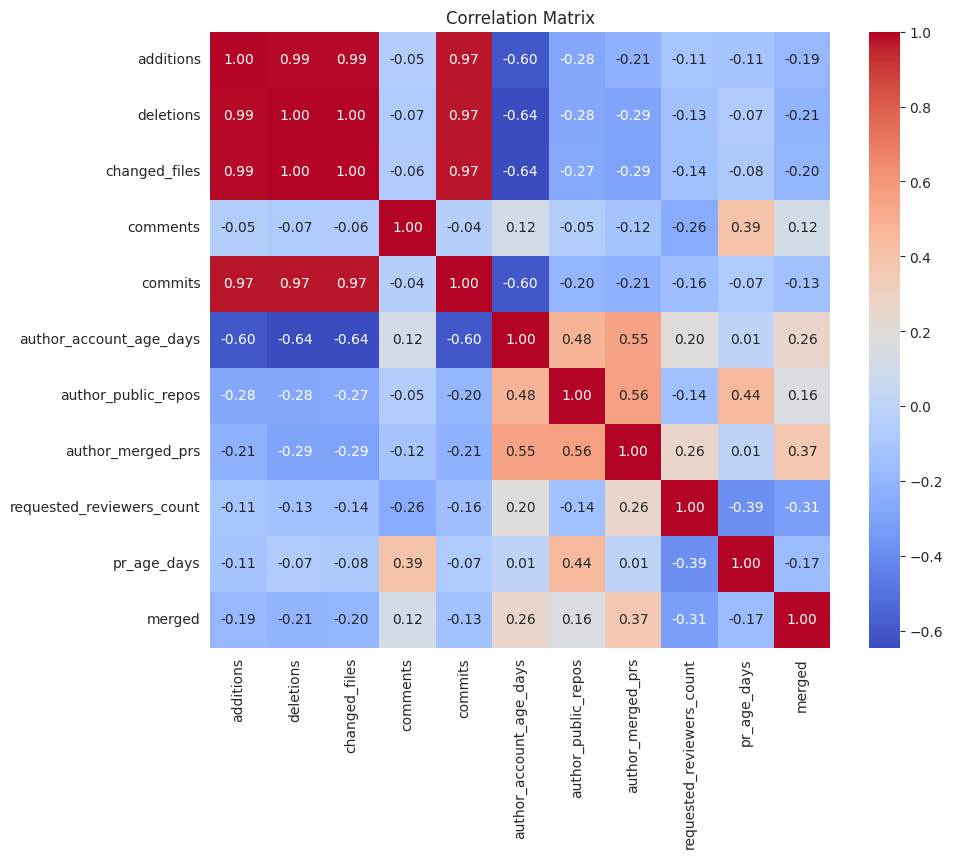

In [12]:
# Correlation matrix for numeric features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_cols + ["merged"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


=== Text Feature Exploration ===


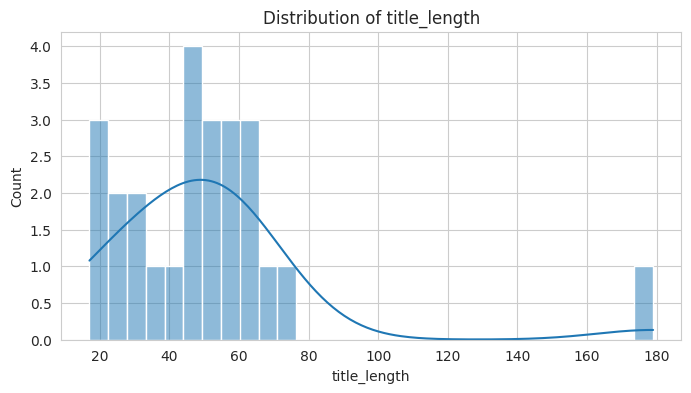

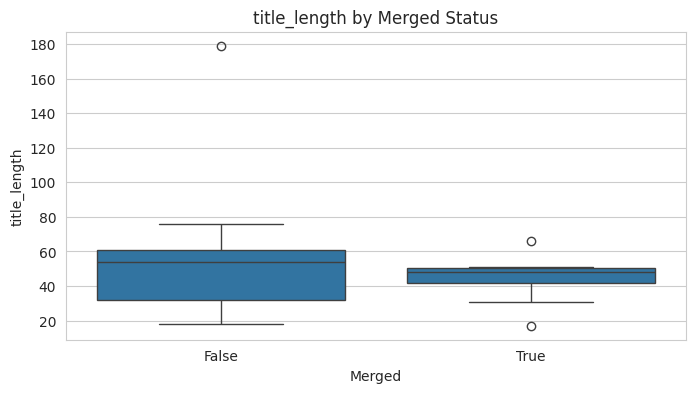

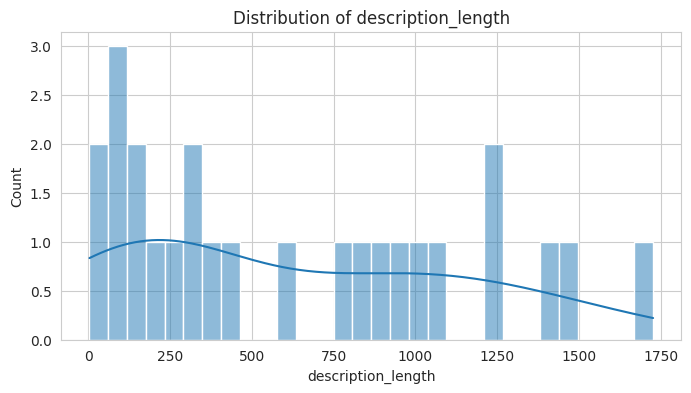

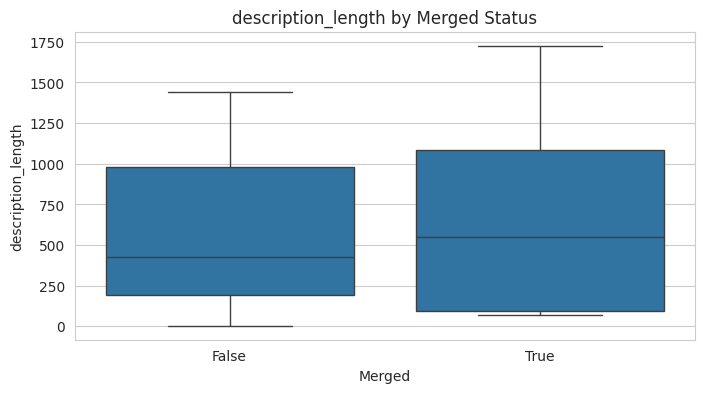

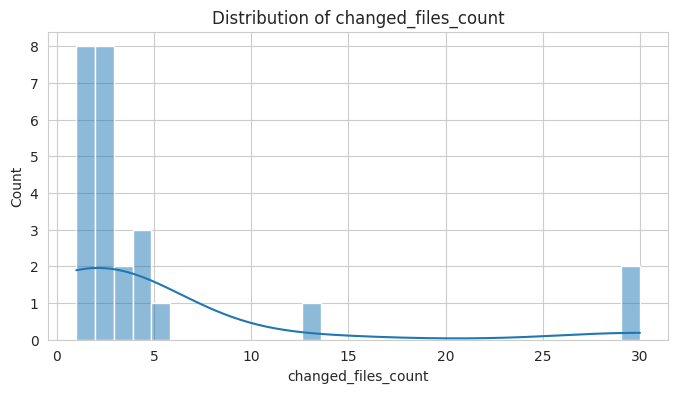

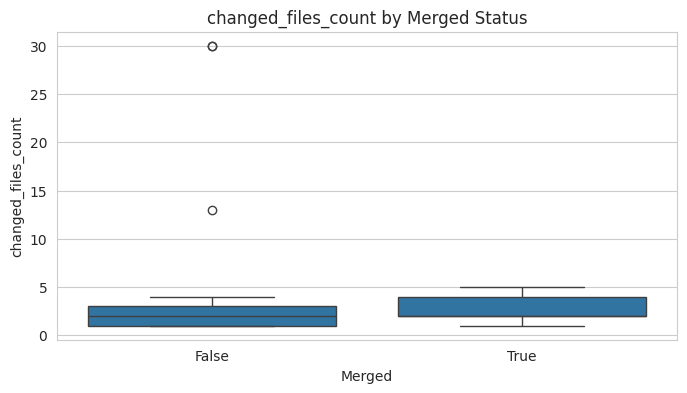

In [13]:
# 6. Text Feature Exploration
print("\n=== Text Feature Exploration ===")
# Add length columns
data["changed_files_count"] = data["changed_files_list"].str.split(",").str.len().fillna(0)

text_cols = ["title_length", "description_length", "changed_files_count"]
for col in text_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="merged", y=col, data=data)
    plt.title(f"{col} by Merged Status")
    plt.xlabel("Merged")
    plt.ylabel(col)
    plt.show()